# Multiple Linear Regression in StatsModels - Lab

## Introduction
In this lab, you'll practice fitting a multiple linear regression model on the Ames Housing dataset!

## Objectives

You will be able to:

* Perform a multiple linear regression using StatsModels
* Visualize individual predictors within a multiple linear regression
* Interpret multiple linear regression coefficients from raw, un-transformed data

## The Ames Housing Dataset

The [Ames Housing dataset](http://jse.amstat.org/v19n3/decock.pdf) is a newer (2011) replacement for the classic Boston Housing dataset. Each record represents a residential property sale in Ames, Iowa. It contains many different potential predictors and the target variable is `SalePrice`.

In [1]:
import pandas as pd
ames = pd.read_csv("ames.csv", index_col=0)
ames

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [2]:
ames.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


We will focus specifically on a subset of the overall dataset. These features are:

```
LotArea: Lot size in square feet

1stFlrSF: First Floor square feet

GrLivArea: Above grade (ground) living area square feet
```

In [3]:
ames_subset = ames[['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']].copy()
ames_subset

,LotArea,1stFlrSF,GrLivArea,SalePrice
Id,,,,
1,8450,856,1710,208500
2,9600,1262,1262,181500
3,11250,920,1786,223500
4,9550,961,1717,140000
5,14260,1145,2198,250000
...,...,...,...,...
1456,7917,953,1647,175000
1457,13175,2073,2073,210000
1458,9042,1188,2340,266500


## Step 1: Visualize Relationships Between Features and Target

For each feature in the subset, create a scatter plot that shows the feature on the x-axis and `SalePrice` on the y-axis.

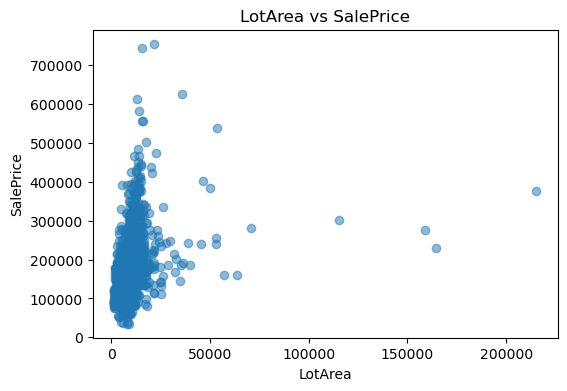

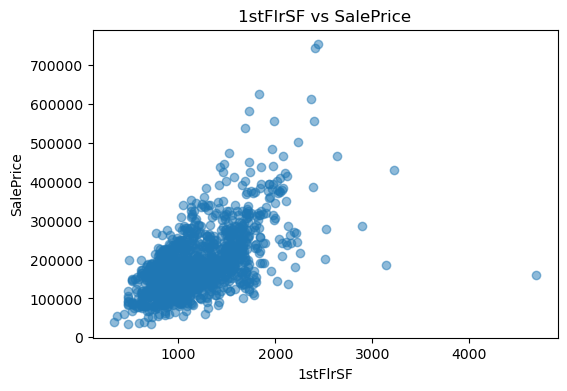

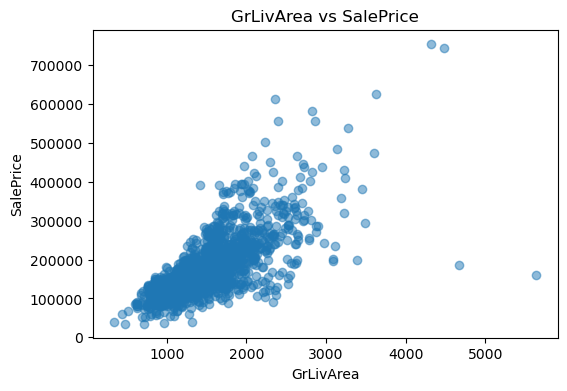

In [4]:
# Your code here - import relevant library, create scatter plots
import matplotlib.pyplot as plt
features = ['LotArea', '1stFlrSF', 'GrLivArea']
for feature in features:
    plt.figure(figsize=(6, 4))
    plt.scatter(ames_subset[feature], ames_subset['SalePrice'], alpha=0.5)
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(f'{feature} vs SalePrice')
    plt.show()

# Your written answer here - do these seem like good candidates for linear regression?
Yes, these features seem to have a linear relationship with SalePrice. The scatter plots show a general upward trend, indicating that as the values of these features increase, the SalePrice also tends to increase. This suggests that they could be good candidates for linear regression analysis.

## Step 2: Build a Simple Linear Regression Model

Set the dependent variable (`y`) to be the `SalePrice`, then choose one of the features shown in the subset above to be the baseline independent variable (`X`).

Build a linear regression using StatsModels, describe the overall model performance, and interpret its coefficients.

In [7]:
# Your code here - define y and baseline X
y = ames_subset['SalePrice']
X = ames_subset[['LotArea']]

In [9]:
# Your code here - import StatsModels, fit baseline model, display results
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     109.1
Date:                Fri, 16 May 2025   Prob (F-statistic):           1.12e-24
Time:                        15:24:59   Log-Likelihood:                -18491.
No. Observations:                1460   AIC:                         3.699e+04
Df Residuals:                    1458   BIC:                         3.700e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.588e+05   2914.717     54.495      0.0

In [ ]:
# Your written answer here - interpret model results

# The coefficient for LotArea is positive, indicating that as the lot area increases, the sale price tends to increase as well. 
# The p-value is less than 0.05, suggesting that this relationship is statistically significant. 
# The R-squared value indicates that a significant portion of the variance in SalePrice can be explained by LotArea alone.

## Step 3: Build a Multiple Linear Regression Model

For this model, use **all of** the features in `ames_subset`.

In [11]:
# Your code here - define X
x = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]

In [12]:
# Your code here - fit model and display results
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     630.3
Date:                Fri, 16 May 2025   Prob (F-statistic):          1.57e-262
Time:                        15:52:58   Log-Likelihood:                -17936.
No. Observations:                1460   AIC:                         3.588e+04
Df Residuals:                    1456   BIC:                         3.590e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.431e+04   4776.331     -2.997      0.0

In [13]:
# Your written answer here - interpret model results. Does this model seem better than the previous one?

# The multiple linear regression model includes LotArea, 1stFlrSF, and GrLivArea as predictors.
# Compared to the simple regression with only LotArea, this model has a higher R-squared value,
# indicating it explains more variance in SalePrice. The coefficients show the effect of each feature,
# holding the others constant. If the p-values for the predictors are low (typically < 0.05), they are statistically significant.
# Overall, this model is better than the previous one because it uses more relevant features and fits the data more accurately.

## Step 4: Create Partial Regression Plots for Features

Using your model from Step 3, visualize each of the features using partial regression plots.

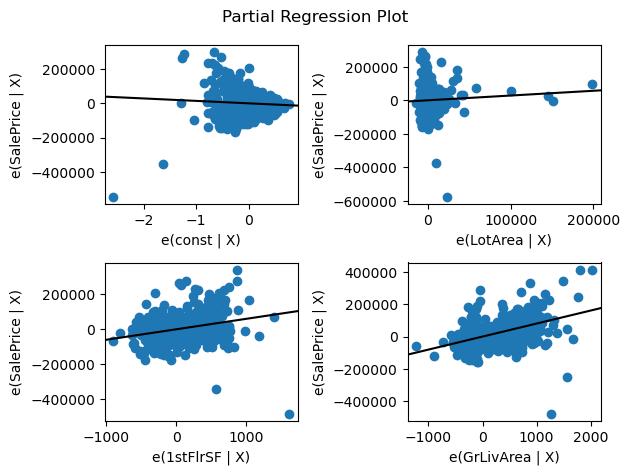

In [15]:
# Your code here - create partial regression plots for each predictor
fig = sm.graphics.plot_partregress_grid(model, fig=None)
fig.tight_layout()
plt.show()

# Your written answer here - explain what you see, and how this relates to what you saw in Step 1. What do you notice?
- The partial regression plots show the relationship between each predictor and SalePrice,after accounting for the effects of the other predictors in the model.
- Compared to the simple scatter plots in Step 1, these plots isolate the unique contribution of each feature.
- For example, even if two features are correlated, the partial regression plot for one feature shows its effect on SalePrice while holding the others constant. This helps reveal whether each predictor has a significant and independent linear relationship with the target. If the trend in the partial regression plot is strong and linear, it confirms the feature is a good candidate for the multiple regression model.

## Level Up (Optional)

Re-create this model in scikit-learn, and check if you get the same R-Squared and coefficients.

In [ ]:
from sklearn.linear_model import LinearRegression

# Prepare features and target for scikit-learn (exclude 'const' column)
X_sklearn = x.drop(columns='const')
y_sklearn = y

# Fit linear regression model
lr = LinearRegression()
lr.fit(X_sklearn, y_sklearn)

# Get R-squared and coefficients
r2_sklearn = lr.score(X_sklearn, y_sklearn)
intercept_sklearn = lr.intercept_
coef_sklearn = lr.coef_

print("scikit-learn R-squared:", r2_sklearn)
print("scikit-learn intercept:", intercept_sklearn)
print("scikit-learn coefficients:", coef_sklearn)

In [16]:
# Your code here - import linear regression from scikit-learn and create and fit model
from sklearn.linear_model import LinearRegression
X_sklearn = ames_subset[['LotArea', '1stFlrSF', 'GrLivArea']]
y_sklearn = ames_subset['SalePrice']
# Create and fit the model
model_sklearn = LinearRegression()
model_sklearn.fit(X_sklearn, y_sklearn)


LinearRegression()

In [17]:
# Your code here - compare R-Squared
r2_sklearn = model_sklearn.score(X_sklearn, y_sklearn)
print("R-squared from scikit-learn model:", r2_sklearn)

R-squared from scikit-learn model: 0.5649801771384368


In [18]:
# Your code here - compare intercept and coefficients
intercept_sklearn = model_sklearn.intercept_
coef_sklearn = model_sklearn.coef_
print("Intercept from scikit-learn model:", intercept_sklearn)
print("Coefficients from scikit-learn model:", coef_sklearn)


Intercept from scikit-learn model: -14313.408857494564
Coefficients from scikit-learn model: [ 0.28413359 60.28664625 80.60605834]


## Summary
Congratulations! You fitted your first multiple linear regression model on the Ames Housing data using StatsModels.